pop = Population, total [SP.POP.TOTL]

D1 = Diarrhea treatment (% of children under 5 receiving oral rehydration and continued feeding) [SH.STA.BORCF.ZS]

D2 = Diarrhea treatment (% of children under 5 who received ORS packet) [SH.STA.ORTH]

MI = Incidence of malaria (per 1,000 population at risk) [SH.MLR.INCD.P3]

P = Physicians (per 1,000 people) [SH.MED.PHYS.ZS]

CHW = Community health workers (per 1,000 people) [SH.MED.CMHW.P3]

F = Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]

LE = Life expectancy at birth, total (years) [SP.DYN.LE00.IN]

PG = Population growth (annual %) [SP.POP.GROW]

PR = Rural population (% of total population) [SP.RUR.TOTL.ZS]

PRG = Rural population growth (annual %) [SP.RUR.TOTL.ZG]

PUG = Urban population growth (annual %) [SP.URB.GROW]

PU = Urban population (% of total) [SP.URB.TOTL.IN.ZS]

S = Improved sanitation facilities (% of population with access) [SH.STA.ACSN]

SU = Improved sanitation facilities, urban (% of urban population with access) [SH.STA.ACSN.UR]

SR = Improved sanitation facilities, rural (% of rural population with access) [SH.STA.ACSN.RU]

W = Improved water source (% of population with access) [SH.H2O.SAFE.ZS]

WU = Improved water source, urban (% of urban population with access) [SH.H2O.SAFE.UR.ZS]

WR = Improved water source, rural (% of rural population with access) [SH.H2O.SAFE.RU.ZS]

OD = People practicing open defecation (% of population) [SH.STA.ODFC.ZS]

ODU = People practicing open defecation, urban (% of urban population) [SH.STA.ODFC.UR.ZS]

ODR = People practicing open defecation, rural (% of rural population) [SH.STA.ODFC.RU.ZS]


In [1]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [2]:
pd.options.display.max_rows = 150
pd.options.display.max_columns = 30

In [3]:
crate = pd.read_csv("~/Desktop/DSI_Capstone/cholerarate.csv", encoding = "utf-8")

In [4]:
cdeath = pd.read_csv("~/Desktop/DSI_Capstone/choleradeath.csv", encoding = "utf-8")

In [5]:
#crate.head()

In [6]:
#cdeath.head()

In [7]:
crate.shape

(2433, 3)

In [8]:
cdeath.shape

(2338, 3)

In [9]:
cdata = pd.merge(crate, cdeath, how = "left", on=["Country", "Year"])

In [10]:
#cdata

In [11]:
cdata.isnull().sum()

Country                                     0
Year                                        0
Number of reported cases of cholera         0
Number of reported deaths from cholera    116
dtype: int64

In [12]:
cdeathrate = pd.read_csv("~/Desktop/DSI_Capstone/choleradr.csv", encoding = "utf-8")

In [13]:
cdeathrate.shape

(2328, 3)

In [14]:
c_data = pd.merge(cdata, cdeathrate, how="left", on=["Country", "Year"])

In [15]:
#c_data

In [16]:
c_data.shape

(2433, 5)

In [17]:
chol_col = ["country", "year", "num_cases", "num_deaths", "fatality_rate"]
c_data.columns = chol_col

In [18]:
c_data.head()

,country,year,num_cases,num_deaths,fatality_rate
0,Afghanistan,2015,58064,8.0,0.01
1,Afghanistan,2014,45481,4.0,0.00
2,Afghanistan,2013,3957,14.0,0.35
3,Afghanistan,2012,12,0.0,0.10
4,Afghanistan,2011,3733,44.0,1.18


In [19]:
c_data["f_rate"] = (c_data.num_deaths / c_data.num_cases) * 100

In [20]:
c_data.fillna(value=0.0, inplace=True)

In [21]:
c_data

,country,year,num_cases,num_deaths,fatality_rate,f_rate
0,Afghanistan,2015,58064,8.0,0.01,0.013778
1,Afghanistan,2014,45481,4.0,0.00,0.008795
2,Afghanistan,2013,3957,14.0,0.35,0.353803
3,Afghanistan,2012,12,0.0,0.10,0.000000
4,Afghanistan,2011,3733,44.0,1.18,1.178677
5,Afghanistan,2010,2369,10.0,0.42,0.422119
6,Afghanistan,2009,662,11.0,1.66,1.661631
7,Afghanistan,2008,4384,22.0,0.50,0.501825
8,Afghanistan,2005,33,0.0,0.00,0.000000
9,Afghanistan,2003,41,7.0,17.07,17.073171


In [22]:
c_data[c_data.f_rate == 450.0] ## there's one entry where the death rate is above the incidence of cholera. 

,country,year,num_cases,num_deaths,fatality_rate,f_rate
1061,Italy,1998,2,9.0,450.0,450.0


In [23]:
c_data.country.nunique()

161

In [24]:
c_data.groupby("year").num_cases.agg(["sum"])

,sum
year,
1949,17
1950,34665
1951,114518
1952,123025
1953,240927
1954,37804
1955,40218
1956,63542
1957,63031


In [25]:
fourteen = c_data[c_data.year == 2014] ## let's use this year for clustering

In [26]:
#fourteen.head()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

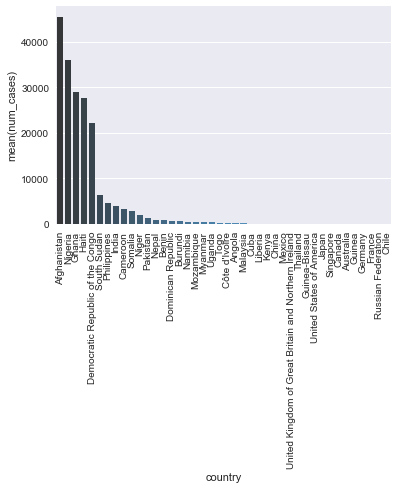

In [27]:
sns.barplot("country", "num_cases", data = fourteen.sort_values("num_cases", ascending = False),
            palette="Blues_d")
plt.xticks (rotation = 90)

In [28]:
cdata2 = c_data[c_data.year >= 2010] ##just including years 2010-2015

In [29]:
#cdata2.head()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

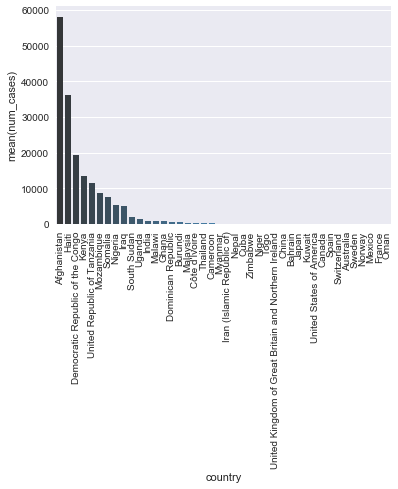

In [30]:
sns.barplot("country", "num_cases", data = c_data[c_data.year == 2015].sort_values("num_cases", ascending = False),
            palette="Blues_d")
plt.xticks (rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

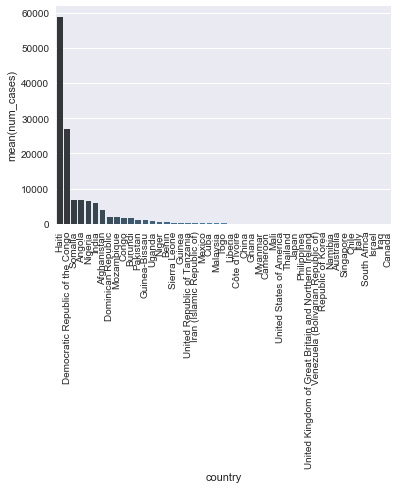

In [31]:
sns.barplot("country", "num_cases", data = c_data[c_data.year == 2013].sort_values("num_cases", ascending = False),
            palette="Blues_d")
plt.xticks (rotation = 90)

In [32]:
#cd3 = cd2.groupby(["country", "year"])[["num_cases", "num_deaths", "f_rate"]].agg(["sum"])

In [33]:
#cd3

In [34]:
#master = pd.merge(cd3, pop, left_index = True, right_index = True)

In [35]:
#master

In [36]:
wb = pd.read_csv("~/Desktop/DSI_Capstone/worldbank.csv", encoding = "utf=8")

In [37]:
wb.head()

,Country Name,Country Code,Year,Year Code,"Population, total [SP.POP.TOTL]",Diarrhea treatment (% of children under 5 receiving oral rehydration and continued feeding) [SH.STA.ORCF.ZS],Diarrhea treatment (% of children under 5 who received ORS packet) [SH.STA.ORTH],"Incidence of malaria (per 1,000 population at risk) [SH.MLR.INCD.P3]","Physicians (per 1,000 people) [SH.MED.PHYS.ZS]","Community health workers (per 1,000 people) [SH.MED.CMHW.P3]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Population growth (annual %) [SP.POP.GROW],Rural population (% of total population) [SP.RUR.TOTL.ZS],Rural population growth (annual %) [SP.RUR.TOTL.ZG],Urban population growth (annual %) [SP.URB.GROW],Urban population (% of total) [SP.URB.TOTL.IN.ZS],Improved sanitation facilities (% of population with access) [SH.STA.ACSN],"Improved sanitation facilities, urban (% of urban population with access) [SH.STA.ACSN.UR]","Improved sanitation facilities, rural (% of rural population with access) [SH.STA.ACSN.RU]",Improved water source (% of population with access) [SH.H2O.SAFE.ZS],"Improved water source, urban (% of urban population with access) [SH.H2O.SAFE.UR.ZS]","Improved water source, rural (% of rural population with access) [SH.H2O.SAFE.RU.ZS]",People practicing open defecation (% of population) [SH.STA.ODFC.ZS],"People practicing open defecation, urban (% of urban population) [SH.STA.ODFC.UR.ZS]","People practicing open defecation, rural (% of rural population) [SH.STA.ODFC.RU.ZS]"
0,Afghanistan,AFG,2010.0,YR2010,27962207,..,..,23.9,0.194,..,5.746,58.9708292682927,2.73688595890095,75.311,2.2388680945065,4.27153804437281,24.689,29.3,41.1,25.4,48,70.7,40.5,15.8,0.6,20.8
1,Afghanistan,AFG,2011.0,YR2011,28809167,47.5,53.3,..,0.234,..,5.506,59.3279512195122,2.98397866645826,74.926,2.47145047840494,4.53135450790465,25.074,29.9,42.1,25.8,49.8,72.6,42.1,14.7,0,19.7
2,Afghanistan,AFG,2012.0,YR2012,29726803,..,..,..,0.225,..,5.272,59.6796097560976,3.13554616440454,74.532,2.60830953106039,4.6946681698713,25.468,30.5,43.1,26.2,51.6,74.5,43.7,13.8,0,18.5
3,Afghanistan,AFG,2013.0,YR2013,30682500,..,..,..,0.266,..,5.05,60.0282682926829,3.16433627387256,74.129,2.6221590963182,4.73433292256046,25.871,31.1,44.1,26.6,53.4,76.3,45.4,12.9,0,17.4
4,Afghanistan,AFG,2014.0,YR2014,31627506,..,..,..,..,..,4.843,60.3744634146342,3.03347255254667,73.718,2.4774933646149,4.60963006738531,26.282,31.8,45.1,27,55.2,78.2,47,12.8,0,17.4


In [38]:
wb[wb.notnull()].shape

(1811, 26)

In [39]:
wb.shape

(1811, 26)

In [40]:
wb

,Country Name,Country Code,Year,Year Code,"Population, total [SP.POP.TOTL]",Diarrhea treatment (% of children under 5 receiving oral rehydration and continued feeding) [SH.STA.ORCF.ZS],Diarrhea treatment (% of children under 5 who received ORS packet) [SH.STA.ORTH],"Incidence of malaria (per 1,000 population at risk) [SH.MLR.INCD.P3]","Physicians (per 1,000 people) [SH.MED.PHYS.ZS]","Community health workers (per 1,000 people) [SH.MED.CMHW.P3]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Population growth (annual %) [SP.POP.GROW],Rural population (% of total population) [SP.RUR.TOTL.ZS],Rural population growth (annual %) [SP.RUR.TOTL.ZG],Urban population growth (annual %) [SP.URB.GROW],Urban population (% of total) [SP.URB.TOTL.IN.ZS],Improved sanitation facilities (% of population with access) [SH.STA.ACSN],"Improved sanitation facilities, urban (% of urban population with access) [SH.STA.ACSN.UR]","Improved sanitation facilities, rural (% of rural population with access) [SH.STA.ACSN.RU]",Improved water source (% of population with access) [SH.H2O.SAFE.ZS],"Improved water source, urban (% of urban population with access) [SH.H2O.SAFE.UR.ZS]","Improved water source, rural (% of rural population with access) [SH.H2O.SAFE.RU.ZS]",People practicing open defecation (% of population) [SH.STA.ODFC.ZS],"People practicing open defecation, urban (% of urban population) [SH.STA.ODFC.UR.ZS]","People practicing open defecation, rural (% of rural population) [SH.STA.ODFC.RU.ZS]"
0,Afghanistan,AFG,2010.0,YR2010,27962207,..,..,23.9,0.194,..,5.746,58.9708292682927,2.73688595890095,75.311,2.2388680945065,4.27153804437281,24.689,29.3,41.1,25.4,48,70.7,40.5,15.8,0.6,20.8
1,Afghanistan,AFG,2011.0,YR2011,28809167,47.5,53.3,..,0.234,..,5.506,59.3279512195122,2.98397866645826,74.926,2.47145047840494,4.53135450790465,25.074,29.9,42.1,25.8,49.8,72.6,42.1,14.7,0,19.7
2,Afghanistan,AFG,2012.0,YR2012,29726803,..,..,..,0.225,..,5.272,59.6796097560976,3.13554616440454,74.532,2.60830953106039,4.6946681698713,25.468,30.5,43.1,26.2,51.6,74.5,43.7,13.8,0,18.5
3,Afghanistan,AFG,2013.0,YR2013,30682500,..,..,..,0.266,..,5.05,60.0282682926829,3.16433627387256,74.129,2.6221590963182,4.73433292256046,25.871,31.1,44.1,26.6,53.4,76.3,45.4,12.9,0,17.4
4,Afghanistan,AFG,2014.0,YR2014,31627506,..,..,..,..,..,4.843,60.3744634146342,3.03347255254667,73.718,2.4774933646149,4.60963006738531,26.282,31.8,45.1,27,55.2,78.2,47,12.8,0,17.4
5,Afghanistan,AFG,2015.0,YR2015,32526562,40.7,46.2,23.6,..,..,4.653,60.7171707317073,2.80298628268961,73.297,2.23025287345193,4.39215196902304,26.703,31.9,45.1,27,55.3,78.2,47,12.7,0,17.4
6,Afghanistan,AFG,2016.0,YR2016,33370000,..,..,..,..,..,..,..,..,72.868,..,..,27.132,..,..,..,..,..,..,..,..,..
7,Albania,ALB,2010.0,YR2010,2913021,..,..,..,1.132,..,1.663,77.0369512195122,-0.49646196338738,47.837,-2.7432914932117,1.60937326447224,52.163,90.9,95.3,86.1,95.6,96.5,94.7,0.3,0,0.6
8,Albania,ALB,2011.0,YR2011,2904780,..,..,..,1.113,..,1.699,77.2405853658537,-0.283303107545257,46.753,-2.57539562970139,1.77349639411719,53.247,91.5,95.3,87.2,95.5,96.1,94.8,0.3,0,0.6
9,Albania,ALB,2012.0,YR2012,2900247,..,..,..,1.145,..,1.735,77.4439756097561,-0.156175015942445,45.67,-2.49985525926711,1.85733551860321,54.33,92.1,95.4,88.3,95.4,95.7,94.9,0.2,0,0.5


In [41]:
def EDA(dataframe):
    print "missing values \n", dataframe.isnull().sum(), "\n"
    print "duplicates \n", dataframe.duplicated().sum(), "\n"
    print "dataframe types \n", dataframe.dtypes, "\n"
    print "dataframe shape \n", dataframe.shape, "\n"
    print "dataframe describe \n", dataframe.describe(), "\n"
    for item in dataframe:
        print item
        print dataframe[item].nunique()

In [42]:
EDA(wb)

missing values 
Country Name                                                                                                    3
Country Code                                                                                                    5
Year                                                                                                            5
Year Code                                                                                                       5
Population, total [SP.POP.TOTL]                                                                                 5
Diarrhea treatment (% of children under 5 receiving oral rehydration and continued feeding) [SH.STA.ORCF.ZS]    5
Diarrhea treatment (% of children under 5 who received ORS packet) [SH.STA.ORTH]                                5
Incidence of malaria (per 1,000 population at risk) [SH.MLR.INCD.P3]                                            5
Physicians (per 1,000 people) [SH.MED.PHYS.ZS]                          

In [43]:
EDA(cdata2)

missing values 
country          0
year             0
num_cases        0
num_deaths       0
fatality_rate    0
f_rate           0
dtype: int64 

duplicates 
0 

dataframe types 
country           object
year               int64
num_cases          int64
num_deaths       float64
fatality_rate    float64
f_rate           float64
dtype: object 

dataframe shape 
(284, 6) 

dataframe describe 
              year      num_cases   num_deaths  fatality_rate      f_rate
count   284.000000     284.000000   284.000000     284.000000  284.000000
mean   2012.369718    5791.707746    84.489437       1.758838    1.759296
std       1.681514   25295.166327   338.377896       3.940182    3.939566
min    2010.000000       1.000000     0.000000       0.000000    0.000000
25%    2011.000000      10.500000     0.000000       0.000000    0.000000
50%    2012.000000     213.500000     2.000000       0.515000    0.525382
75%    2014.000000    1795.000000    21.000000       2.025000    2.026079
max    2015.0000

In [44]:
cdata2.dtypes

country           object
year               int64
num_cases          int64
num_deaths       float64
fatality_rate    float64
f_rate           float64
dtype: object

In [45]:
cdata2.year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010])

In [46]:
#cdata2["Year"] = pd.to_datetime(cdata2.year, yearfirst = True)

In [47]:
cdata2.head()

,country,year,num_cases,num_deaths,fatality_rate,f_rate
0,Afghanistan,2015,58064,8.0,0.01,0.013778
1,Afghanistan,2014,45481,4.0,0.00,0.008795
2,Afghanistan,2013,3957,14.0,0.35,0.353803
3,Afghanistan,2012,12,0.0,0.10,0.000000
4,Afghanistan,2011,3733,44.0,1.18,1.178677


In [48]:
cdata2.dtypes

country           object
year               int64
num_cases          int64
num_deaths       float64
fatality_rate    float64
f_rate           float64
dtype: object

In [49]:
#cdata2.to_csv("~/Desktop/DSI_Capstone/cdata2.csv", index = False, encoding = "utf=8")

In [50]:
wb.drop(["Country Code", "Year Code"], axis = 1, inplace = True)

In [51]:
wb2 = wb.loc[0:1805,:]

In [52]:
#wb2.columns

In [53]:
wb2_col = ["country", "year", "pop", "D1", "D2", "MI", "P", "CHW", "F",
           "LE", "PG", "PR", "PRG", "PUG", "PU", "S", "SU", "SR", "W", "WU", 
           "WR", "OD", "ODU", "ODR"]

In [54]:
wb2.columns = wb2_col

In [55]:
wb2.head()

,country,year,pop,D1,D2,MI,P,CHW,F,LE,PG,PR,PRG,PUG,PU,S,SU,SR,W,WU,WR,OD,ODU,ODR
0,Afghanistan,2010.0,27962207,..,..,23.9,0.194,..,5.746,58.9708292682927,2.73688595890095,75.311,2.2388680945065,4.27153804437281,24.689,29.3,41.1,25.4,48,70.7,40.5,15.8,0.6,20.8
1,Afghanistan,2011.0,28809167,47.5,53.3,..,0.234,..,5.506,59.3279512195122,2.98397866645826,74.926,2.47145047840494,4.53135450790465,25.074,29.9,42.1,25.8,49.8,72.6,42.1,14.7,0,19.7
2,Afghanistan,2012.0,29726803,..,..,..,0.225,..,5.272,59.6796097560976,3.13554616440454,74.532,2.60830953106039,4.6946681698713,25.468,30.5,43.1,26.2,51.6,74.5,43.7,13.8,0,18.5
3,Afghanistan,2013.0,30682500,..,..,..,0.266,..,5.05,60.0282682926829,3.16433627387256,74.129,2.6221590963182,4.73433292256046,25.871,31.1,44.1,26.6,53.4,76.3,45.4,12.9,0,17.4
4,Afghanistan,2014.0,31627506,..,..,..,..,..,4.843,60.3744634146342,3.03347255254667,73.718,2.4774933646149,4.60963006738531,26.282,31.8,45.1,27,55.2,78.2,47,12.8,0,17.4


In [56]:
wb2[wb2.D1 != ".."]

,country,year,pop,D1,D2,MI,P,CHW,F,LE,PG,PR,PRG,PUG,PU,S,SU,SR,W,WU,WR,OD,ODU,ODR
1,Afghanistan,2011.0,28809167,47.5,53.3,..,0.234,..,5.506,59.3279512195122,2.98397866645826,74.926,2.47145047840494,4.53135450790465,25.074,29.9,42.1,25.8,49.8,72.6,42.1,14.7,0,19.7
5,Afghanistan,2015.0,32526562,40.7,46.2,23.6,..,..,4.653,60.7171707317073,2.80298628268961,73.297,2.23025287345193,4.39215196902304,26.703,31.9,45.1,27,55.3,78.2,47,12.7,0,17.4
17,Algeria,2013.0,38186135,41.7,25.3,..,..,..,2.893,74.5689512195122,1.97481446070098,30.49,-0.102507335082152,2.89981001822718,69.51,87.2,90,80.9,84.5,85.5,82.1,1.4,0.3,3.9
58,Argentina,2012.0,42095224,59.1,17.5,..,..,..,2.347,75.816243902439,1.04980926143269,8.705,-0.794079512731845,1.22741303170623,91.295,95.5,95.4,96.3,98.6,98.8,96.2,1.5,1.5,1.3
63,Armenia,2010.0,2963496,77.1,33,..,2.743,..,1.648,74.2263414634146,-0.0881003240332919,36.42,0.487424816662534,-0.41628748109029,63.58,89.5,95.9,78.2,98.4,99.6,96.5,0,0,0
92,Azerbaijan,2011.0,9173082,62,11.1,..,3.379,..,1.96,70.5518048780488,1.30300085487651,46.377,0.825455732338632,1.71786304117758,53.623,83.2,87.8,77.8,83.6,93,72.8,0.2,0.2,0.3
113,Bangladesh,2011.0,153405612,75.5,77.6,..,0.356,0.334,2.286,70.4719512195122,1.17293390457173,68.775,0.0696287106394348,3.64683741700863,31.225,56.8,55.9,57.2,84.2,85.6,83.5,3.7,0.6,5.1
115,Bangladesh,2013.0,157157394,64.6,..,..,..,..,2.209,71.245243902439,1.21635117232582,67.247,0.0881167827907763,3.57347157514761,32.753,58.7,56.8,59.6,85.5,86.1,85.3,1.2,0,1.8
116,Bangladesh,2014.0,159077513,66.1,77,..,..,..,2.175,71.6259024390244,1.21437738484915,66.484,0.0732683236553304,3.51721498276979,33.516,59.6,57.2,60.8,86.2,86.3,86.1,1.2,0,1.8
128,Belarus,2012.0,9464495,61.2,45.3,..,3.858,..,1.62,71.9658536585366,-0.0916374821376228,24.533,-1.79310203835048,0.467773115091911,75.467,94.4,94,95.6,99.7,99.9,99.1,0,0,0


In [57]:
wb2.year = wb2.year.astype(int)

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [58]:
wb2.replace("..", 0, inplace = True)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [59]:
wb2.fillna(value = 0, inplace = True)

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [60]:
wb2["pop"] = wb2["pop"].astype(float)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [61]:
wb2.dtypes

country     object
year         int64
pop        float64
D1          object
D2          object
MI          object
P           object
CHW         object
F           object
LE          object
PG          object
PR          object
PRG         object
PUG         object
PU          object
S           object
SU          object
SR          object
W           object
WU          object
WR          object
OD          object
ODU         object
ODR         object
dtype: object

In [62]:
#df[['col2','col3']] = df[['col2','col3']].apply(pd.to_numeric)
wb2[["D1", "D2", "MI", "P", "CHW", "F", "LE", "PG", "PR", "PRG", "PUG", "PU", "S", "SU", "SR", "W", "WU", 
     "WR", "OD", "ODU", "ODR"]] = wb2[["D1", "D2", "MI", "P", "CHW", "F", "LE", "PG", "PR", "PRG", "PUG", 
                                       "PU", "S", "SU", "SR", "W", "WU", "WR", "OD", "ODU", "ODR"]].apply(pd.to_numeric)

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [63]:
EDA(wb2)

missing values 
country    0
year       0
pop        0
D1         0
D2         0
MI         0
P          0
CHW        0
F          0
LE         0
PG         0
PR         0
PRG        0
PUG        0
PU         0
S          0
SU         0
SR         0
W          0
WU         0
WR         0
OD         0
ODU        0
ODR        0
dtype: int64 

duplicates 
0 

dataframe types 
country     object
year         int64
pop        float64
D1         float64
D2         float64
MI         float64
P          float64
CHW        float64
F          float64
LE         float64
PG         float64
PR         float64
PRG        float64
PUG        float64
PU         float64
S          float64
SU         float64
SR         float64
W          float64
WU         float64
WR         float64
OD         float64
ODU        float64
ODR        float64
dtype: object 

dataframe shape 
(1806, 24) 

dataframe describe 
              year           pop           D1           D2           MI  \
count  1806.000000  1.80600

In [64]:
wb2.country.unique()

array([u'Afghanistan', u'Albania', u'Algeria', u'American Samoa',
       u'Andorra', u'Angola', u'Antigua and Barbuda', u'Arab World',
       u'Argentina', u'Armenia', u'Aruba', u'Australia', u'Austria',
       u'Azerbaijan', u'Bahamas, The', u'Bahrain', u'Bangladesh',
       u'Barbados', u'Belarus', u'Belgium', u'Belize', u'Benin',
       u'Bermuda', u'Bhutan', u'Bolivia', u'Bosnia and Herzegovina',
       u'Botswana', u'Brazil', u'British Virgin Islands',
       u'Brunei Darussalam', u'Bulgaria', u'Burkina Faso', u'Burundi',
       u'Cabo Verde', u'Cambodia', u'Cameroon', u'Canada',
       u'Caribbean small states', u'Cayman Islands',
       u'Central African Republic', u'Central Europe and the Baltics',
       u'Chad', u'Channel Islands', u'Chile', u'China', u'Colombia',
       u'Comoros', u'Congo, Dem. Rep.', u'Congo, Rep.', u'Costa Rica',
       u"Cote d'Ivoire", u'Croatia', u'Cuba', u'Curacao', u'Cyprus',
       u'Czech Republic', u'Denmark', u'Djibouti', u'Dominica',
       u'Do

In [65]:
wb2.country.replace("Bahamas, The", "Bahamas", inplace = True)
wb2.country.replace("Cote d'Ivoire", "Côte d'Ivoire", inplace = True)
wb2.country.replace("Congo, Rep.", "Congo", inplace = True)
wb2.country.replace("Congo, Dem. Rep.", "Democratic Republic of the Congo", inplace = True)
wb2.country.replace("Iran, Islamic Rep.", "Iran (Islamic Republic of)", inplace = True)
wb2.country.replace("Lao PDR", "Lao People's Democratic Republic", inplace = True)
wb2.country.replace("Korea, Rep.", "Republic of Korea", inplace = True)
wb2.country.replace("United Kingdom", "United Kingdom of Great Britain and Northern Ireland", inplace = True)
wb2.country.replace("Tanzania", "United Republic of Tanzania", inplace = True)
wb2.country.replace("United States", "United States of America", inplace = True)
wb2.country.replace("Venezuela, RB", "Venezuela (Bolivarian Republic of)", inplace = True)
wb2.country.replace("Vietnam", "Viet Nam", inplace = True)
wb2.country.replace("Yemen, Rep.", "Yemen", inplace = True)



/Applications/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [66]:
wb2.country.unique()

array([u'Afghanistan', u'Albania', u'Algeria', u'American Samoa',
       u'Andorra', u'Angola', u'Antigua and Barbuda', u'Arab World',
       u'Argentina', u'Armenia', u'Aruba', u'Australia', u'Austria',
       u'Azerbaijan', 'Bahamas', u'Bahrain', u'Bangladesh', u'Barbados',
       u'Belarus', u'Belgium', u'Belize', u'Benin', u'Bermuda', u'Bhutan',
       u'Bolivia', u'Bosnia and Herzegovina', u'Botswana', u'Brazil',
       u'British Virgin Islands', u'Brunei Darussalam', u'Bulgaria',
       u'Burkina Faso', u'Burundi', u'Cabo Verde', u'Cambodia',
       u'Cameroon', u'Canada', u'Caribbean small states',
       u'Cayman Islands', u'Central African Republic',
       u'Central Europe and the Baltics', u'Chad', u'Channel Islands',
       u'Chile', u'China', u'Colombia', u'Comoros',
       'Democratic Republic of the Congo', 'Congo', u'Costa Rica',
       "C\xc3\xb4te d'Ivoire", u'Croatia', u'Cuba', u'Curacao', u'Cyprus',
       u'Czech Republic', u'Denmark', u'Djibouti', u'Dominica',
   

In [67]:
wb2.country.replace("C\xc3\xb4te d'Ivoire", u"C\xf4te d'Ivoire", inplace = True)


/Applications/anaconda/lib/python2.7/site-packages/pandas/core/missing.py:42: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  mask = arr == x


In [68]:
master = pd.merge(cdata2, wb2, how = "left", on = ["country", "year"] )

In [69]:
EDA(master)

missing values 
country          0
year             0
num_cases        0
num_deaths       0
fatality_rate    0
f_rate           0
pop              0
D1               0
D2               0
MI               0
P                0
CHW              0
F                0
LE               0
PG               0
PR               0
PRG              0
PUG              0
PU               0
S                0
SU               0
SR               0
W                0
WU               0
WR               0
OD               0
ODU              0
ODR              0
dtype: int64 

duplicates 
0 

dataframe types 
country           object
year               int64
num_cases          int64
num_deaths       float64
fatality_rate    float64
f_rate           float64
pop              float64
D1               float64
D2               float64
MI               float64
P                float64
CHW              float64
F                float64
LE               float64
PG               float64
PR               float64
PRG 

In [70]:
master["chol_per_1000"] = (master.num_cases.astype(float) / master["pop"]) * 1000

In [71]:
max(master.chol_per_1000)

33.545065545313946

In [72]:
master["death_by_chol_per_100k"] = (master.num_deaths.astype(float) / master["pop"]) * 100000

In [73]:
max(master.death_by_chol_per_100k)

39.901528228531149

In [74]:
#master.to_csv("~/Desktop/DSI_Capstone/master.csv", index = False, encoding = "utf=8")

In [75]:
master.chol_per_1000.median()

0.008111430257794067

In [76]:
master[master.chol_per_1000 > 1]

,country,year,num_cases,num_deaths,fatality_rate,f_rate,pop,D1,D2,MI,P,CHW,F,LE,PG,PR,PRG,PUG,PU,S,SU,SR,W,WU,WR,OD,ODU,ODR,chol_per_1000,death_by_chol_per_100k
0,Afghanistan,2015,58064,8.0,0.01,0.013778,32526562.0,40.7,46.2,23.6,0.000,0.0,4.653,60.717171,2.802986,73.297,2.230253,4.392152,26.703,31.9,45.1,27.0,55.3,78.2,47.0,12.7,0.0,17.4,1.785126,0.024595
1,Afghanistan,2014,45481,4.0,0.00,0.008795,31627506.0,0.0,0.0,0.0,0.000,0.0,4.843,60.374463,3.033473,73.718,2.477493,4.609630,26.282,31.8,45.1,27.0,55.2,78.2,47.0,12.8,0.0,17.4,1.438020,0.012647
46,Cameroon,2011,22433,783.0,3.49,3.490394,21119065.0,46.5,17.2,0.0,0.000,0.0,4.938,54.137366,2.533832,47.901,1.324077,3.659171,52.099,44.9,61.6,26.8,73.1,93.4,51.0,6.3,0.9,12.2,1.062216,3.707550
55,Chad,2011,17267,458.0,2.65,2.652458,12298512.0,0.0,0.0,0.0,0.000,0.0,6.485,50.331951,3.324413,77.952,3.241060,3.619670,22.048,11.8,30.9,6.4,50.2,70.8,44.4,65.3,14.4,79.7,1.403991,3.724028
80,Djibouti,2010,2047,19.0,0.93,0.928188,830802.0,0.0,0.0,7.7,0.229,0.0,3.484,60.360683,1.296887,23.004,1.071025,1.364467,76.996,48.4,60.6,7.4,89.2,96.6,64.5,20.1,4.0,73.7,2.463884,2.286947
85,Dominican Republic,2011,20851,336.0,1.61,1.611434,10027140.0,0.0,0.0,0.0,1.490,0.0,2.568,72.945293,1.296442,25.071,-3.291385,2.879740,74.929,82.5,85.6,73.4,85.7,87.2,80.9,3.6,2.1,8.0,2.079456,3.350906
95,Ghana,2014,28944,243.0,0.80,0.839552,26786598.0,41.5,48.6,0.0,0.000,0.0,4.168,61.311634,2.350076,46.608,0.950291,3.588229,53.392,14.8,20.2,8.6,87.6,92.3,82.2,19.3,6.8,33.7,1.080540,0.907170
106,Guinea-Bissau,2012,3068,22.0,0.72,0.717080,1714620.0,0.0,0.0,0.0,0.000,0.0,4.972,54.503512,2.426886,53.076,0.851146,4.239665,46.924,20.2,33.5,8.5,73.6,92.5,56.9,18.1,1.6,32.7,1.789318,1.283083
107,Haiti,2015,36045,322.0,0.90,0.893328,10711067.0,0.0,0.0,8.4,0.000,0.0,2.973,63.073756,1.306577,41.355,-1.574958,3.389669,58.645,27.6,33.6,19.2,57.7,64.9,47.6,19.0,7.7,35.0,3.365211,3.006236
108,Haiti,2014,27753,296.0,1.10,1.066551,10572029.0,0.0,0.0,0.0,0.000,0.0,3.033,62.747439,1.340573,42.564,-1.594967,3.572987,57.436,27.4,33.6,19.2,57.5,64.9,47.6,19.3,7.7,35.0,2.625135,2.799841


In [77]:
master.country.nunique()

80

In [78]:
master.sort_values("chol_per_1000", ascending = False)

,country,year,num_cases,num_deaths,fatality_rate,f_rate,pop,D1,D2,MI,P,CHW,F,LE,PG,PR,PRG,PUG,PU,S,SU,SR,W,WU,WR,OD,ODU,ODR,chol_per_1000,death_by_chol_per_100k
111,Haiti,2011,340311,2869.0,0.84,0.843052,1.014489e+07,0.0,0.00,0.000000,0.0000,0.000,3.2450,61.645195,1.442334,46.544,-1.604605,4.173074,53.456,26.3,33.5,18.1,58.9,68.5,48.0,22.5,8.4,38.8,33.545066,28.280247
112,Haiti,2010,179379,3990.0,2.22,2.224341,9.999617e+06,0.0,0.00,20.200000,0.0000,0.000,3.3250,61.240122,1.477559,47.984,-1.586485,4.389840,52.016,25.9,33.5,17.7,59.3,69.7,48.1,23.7,8.6,40.0,17.938587,39.901528
110,Haiti,2012,112076,894.0,0.80,0.797673,1.028883e+07,56.7,52.90,0.000000,0.0000,0.000,3.1690,62.033390,1.408852,45.159,-1.612004,3.966776,54.841,26.7,33.5,18.4,58.5,67.3,47.9,21.4,8.1,37.5,10.892980,8.689036
227,Somalia,2011,77636,1130.0,1.46,1.455510,9.806670e+06,0.0,0.00,0.000000,0.0000,0.000,6.7680,54.356951,2.320628,62.298,1.612044,3.502592,37.702,23.5,52.0,6.3,31.7,69.6,8.8,52.5,2.7,82.7,7.916653,11.522770
109,Haiti,2013,58809,593.0,1.01,1.008349,1.043125e+07,0.0,0.00,0.000000,0.0000,0.000,3.0980,62.401146,1.374737,43.832,-1.607813,3.765652,56.168,27.1,33.5,18.8,58.0,66.1,47.7,20.3,7.9,36.3,5.637772,5.684842
218,Sierra Leone,2012,23124,299.0,1.29,1.293029,6.043157e+06,0.0,0.00,0.000000,0.0000,0.000,4.8740,49.749098,2.246551,61.115,1.711292,3.093644,38.885,12.8,22.7,6.6,59.5,83.1,44.5,23.2,7.6,33.2,3.826477,4.947745
107,Haiti,2015,36045,322.0,0.90,0.893328,1.071107e+07,0.0,0.00,8.400000,0.0000,0.000,2.9730,63.073756,1.306577,41.355,-1.574958,3.389669,58.645,27.6,33.6,19.2,57.7,64.9,47.6,19.0,7.7,35.0,3.365211,3.006236
108,Haiti,2014,27753,296.0,1.10,1.066551,1.057203e+07,0.0,0.00,0.000000,0.0000,0.000,3.0330,62.747439,1.340573,42.564,-1.594967,3.572987,57.436,27.4,33.6,19.2,57.5,64.9,47.6,19.3,7.7,35.0,2.625135,2.799841
80,Djibouti,2010,2047,19.0,0.93,0.928188,8.308020e+05,0.0,0.00,7.700000,0.2290,0.000,3.4840,60.360683,1.296887,23.004,1.071025,1.364467,76.996,48.4,60.6,7.4,89.2,96.6,64.5,20.1,4.0,73.7,2.463884,2.286947
226,Somalia,2012,22576,200.0,0.89,0.885897,1.003363e+07,0.0,0.00,0.000000,0.0000,0.000,6.6660,54.690244,2.287968,61.847,1.561398,3.477090,38.153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.250033,1.993297


In [79]:
## Haiti, Somalia, Sierra Leone, Djibouti, Dominican Republic, Guinea-Bissau, Afghanistan, Chad, Papua New Guinea,
## Yemen, Ghana, Cameroon, Guinea, South Sudan, Zambia, Democratic Republic of the Congo, Liberia, Congo, 
## Mozambique, Niger, Kenya, Angola, Nigeria, United Republic of Tanzania, Namibia, Uganda, Burundi, 
## Iraq, Mali, Benin 

In [80]:
master.country.unique()

array([u'Afghanistan', u'Angola', u'Australia', u'Bahamas', u'Bahrain',
       u'Benin', u'Brazil', u'Brunei Darussalam', u'Burkina Faso',
       u'Burundi', u"C\xf4te d'Ivoire", u'Cambodia', u'Cameroon',
       u'Canada', u'Central African Republic', u'Chad', u'Chile', u'China',
       u'Congo', u'Cuba', u'Democratic Republic of the Congo', u'Djibouti',
       u'Dominican Republic', u'Ethiopia', u'France', u'Germany', u'Ghana',
       u'Guinea', u'Guinea-Bissau', u'Haiti', u'India',
       u'Iran (Islamic Republic of)', u'Iraq', u'Israel', u'Italy',
       u'Japan', u'Kenya', u'Kuwait', u"Lao People's Democratic Republic",
       u'Liberia', u'Malawi', u'Malaysia', u'Mali', u'Mauritania',
       u'Mexico', u'Mozambique', u'Myanmar', u'Namibia', u'Nepal',
       u'Niger', u'Nigeria', u'Norway', u'Oman', u'Pakistan',
       u'Papua New Guinea', u'Philippines', u'Republic of Korea',
       u'Russian Federation', u'Rwanda', u'Senegal', u'Sierra Leone',
       u'Singapore', u'Somalia', u'S

In [81]:
temp1 = pd.read_excel("~/Desktop/DSI_Capstone/temp1.xls")
temp2 = pd.read_excel("~/Desktop/DSI_Capstone/temp2.xls")
temp3 = pd.read_excel("~/Desktop/DSI_Capstone/temp3.xls")
rain1 = pd.read_excel("~/Desktop/DSI_Capstone/rain1.xls")
rain2 = pd.read_excel("~/Desktop/DSI_Capstone/rain2.xls")
rain3 = pd.read_excel("~/Desktop/DSI_Capstone/rain3.xls")

In [82]:
rain3.head()

,Rainfall (mm),Year,Month,Country,ISO3,ISO2
0,0.68082,1991,1,OMN,NaN,NaN
1,11.74830,1991,2,OMN,NaN,NaN
2,10.58730,1991,3,OMN,NaN,NaN
3,0.53852,1991,4,OMN,NaN,NaN
4,0.31470,1991,5,OMN,NaN,NaN


In [83]:
print rain3.columns
print temp3.columns

Index([u'Rainfall (mm)', u'\tYear', u' Month', u' Country', u' ISO3',
       u' ISO2'],
      dtype='object')
Index([u'Temperature (C)', u'\tYear', u' Month', u' Country', u' ISO3',
       u' ISO2'],
      dtype='object')


In [84]:
temp1.drop([" ISO2", " ISO3"], axis = 1, inplace = True)
temp2.drop([" ISO2", " ISO3"], axis = 1, inplace = True)
temp3.drop([" ISO2", " ISO3"], axis = 1, inplace = True)

rain1.drop([" ISO2", " ISO3"], axis = 1, inplace = True)
rain2.drop([" ISO2", " ISO3"], axis = 1, inplace = True)
rain3.drop([" ISO2", " ISO3"], axis = 1, inplace = True)

In [85]:
rain_col = ["rain_mm", "year", "month", "country"]
temp_col = ["temp_c", "year", "month", "country"]

In [86]:
temp1.columns = temp_col
temp2.columns = temp_col
temp3.columns = temp_col

rain1.columns = rain_col
rain2.columns = rain_col
rain3.columns = rain_col

In [87]:
rain1 = rain1[rain1.year >= 2010]

In [88]:
rain2 = rain2[rain2.year >= 2010]
rain3 = rain3[rain3.year >= 2010]

temp1 = temp1[temp1.year >= 2010]
temp2 = temp2[temp2.year >= 2010]
temp3 = temp3[temp3.year >= 2010]

In [89]:
rain1.country.unique()

array([u'AFG', u'AGO', u'BEN', u'BDI', u'CMR', u'TCD', u'COG', u'ZAR',
       u'DJI', u'DOM', u'GHA', u'GIN', u'GNB', u'HTI', u'IRQ', u'KEN',
       u'LBR', u'MLI', u'MOZ', u'NAM', u'NER', u'NGA', u'PNG', u'SLE',
       u'SOM', u'TZA', u'UGA', u'YEM', u'ZMB'], dtype=object)

In [90]:
temp1.country.unique()

array([u'AFG', u'AGO', u'BEN', u'BDI', u'CMR', u'TCD', u'COG', u'ZAR',
       u'DJI', u'DOM', u'GHA', u'GIN', u'GNB', u'HTI', u'IRQ', u'KEN',
       u'LBR', u'MLI', u'MOZ', u'NAM', u'NER', u'NGA', u'PNG', u'SLE',
       u'SOM', u'TZA', u'UGA', u'YEM', u'ZMB'], dtype=object)

In [91]:
rain2.country.unique()

array([u'AUS', u'BHR', u'BRA', u'BRN', u'BFA', u'KHM', u'CAN', u'CAF',
       u'CHL', u'CHN', u'CIV', u'CUB', u'ETH', u'FRA', u'DEU', u'IND',
       u'IRN', u'ISR', u'ITA', u'JPN', u'KWT', u'LAO', u'MWI', u'MYS',
       u'MRT', u'MEX', u'MMR', u'NPL', u'NOR', u'BHS'], dtype=object)

In [92]:
temp2.country.unique()

array([u'AUS', u'BHR', u'BRA', u'BRN', u'BFA', u'KHM', u'CAN', u'CAF',
       u'CHL', u'CHN', u'CIV', u'CUB', u'ETH', u'FRA', u'DEU', u'IND',
       u'IRN', u'ISR', u'ITA', u'JPN', u'KWT', u'LAO', u'MWI', u'MYS',
       u'MRT', u'MEX', u'MMR', u'NPL', u'NOR', u'BHS'], dtype=object)

In [93]:
rain3.country.unique()

array([u'OMN', u'PAK', u'PHL', u'RUS', u'RWA', u'SEN', u'SGP', u'ZAF',
       u'KOR', u'ESP', u'SWE', u'CHE', u'THA', u'TGO', u'UKR', u'GBR',
       u'USA', u'VEN', u'VNM', u'ZWE'], dtype=object)

In [94]:
temp3.country.unique()

array([u'OMN', u'PAK', u'PHL', u'RUS', u'RWA', u'SEN', u'SGP', u'ZAF',
       u'KOR', u'ESP', u'SWE', u'CHE', u'THA', u'TGO', u'UKR', u'GBR',
       u'USA', u'VEN', u'VNM', u'ZWE'], dtype=object)

In [95]:
w1 = pd.merge(temp1, rain1, how = "outer", on = ["country", "year", "month"])

In [96]:
#w1

In [97]:
w2 = pd.merge(temp2, rain2, how = "outer", on = ["country", "year", "month"])

In [98]:
#w2

In [99]:
w3 = pd.merge(temp3, rain3, how = "outer", on = ["country", "year", "month"])

In [100]:
#w3

In [101]:
W = [w1, w2, w3]
w_all = pd.concat(W)

In [102]:
w_all

,temp_c,year,month,country,rain_mm
0,3.78680,2010,1,AFG,25.30700
1,3.02271,2010,2,AFG,68.73960
2,11.05040,2010,3,AFG,34.03650
3,16.33290,2010,4,AFG,25.70230
4,19.51370,2010,5,AFG,47.32230
5,24.04120,2010,6,AFG,11.91920
6,25.72270,2010,7,AFG,18.63500
7,24.60780,2010,8,AFG,23.58910
8,19.36780,2010,9,AFG,6.15315
9,16.50720,2010,10,AFG,5.21785


In [103]:
#w_all.date = pd.to_datetime(w_all[["year", "month"]])
w_all.dtypes

temp_c     float64
year         int64
month        int64
country     object
rain_mm    float64
dtype: object

In [104]:
w_all["day"] = 1

In [105]:
w_all["date"] = pd.to_datetime(w_all[["year", "month", "day"]])

In [106]:
print w_all.head()
print w_all.dtypes

     temp_c  year  month country  rain_mm  day       date
0   3.78680  2010      1     AFG  25.3070    1 2010-01-01
1   3.02271  2010      2     AFG  68.7396    1 2010-02-01
2  11.05040  2010      3     AFG  34.0365    1 2010-03-01
3  16.33290  2010      4     AFG  25.7023    1 2010-04-01
4  19.51370  2010      5     AFG  47.3223    1 2010-05-01
temp_c            float64
year                int64
month               int64
country            object
rain_mm           float64
day                 int64
date       datetime64[ns]
dtype: object


In [107]:
## replacing country ISO3 codes in weather df with names from 
## master df

##s = Series(['abc', 'abe', 'abg'])
#d = {'b': 'B'}
#s.replace(d)

# s.replace(d, regex=True)
#s.replace({'abc':'ABC'})

In [108]:
#w_all.country.unique()

In [109]:
#master.country.unique()

In [110]:
cd = {"AFG":"Afghanistan", "AGO":"Angola", "BEN":"Benin", "BDI":"Burundi", "CMR":"Cameroon",
      "TCD":"Chad", "COG":"Congo", "ZAR":"Democratic Republic of the Congo", "DJI":"Djibouti", "DOM":"Dominican Republic",
      "GHA":"Ghana", "GIN":"Guinea", "GNB":"Guinea-Bissau", "HTI":"Haiti", "IRQ":"Iraq",
      "KEN":"Kenya", "LBR":"Liberia", "MLI":"Mali", "MOZ":"Mozambique", "NAM":"Namibia",
      "NER":"Niger", "NGA":"Nigeria", "PNG":"Papua New Guinea", "SLE":"Sierra Leone", "SOM":"Somalia", 
      "TZA":"United Republic of Tanzania", "UGA":"Uganda", "YEM":"Yemen", "ZMB":"Zambia", "AUS":"Australia",
      "BHR":"Bahrain", "BRA":"Brazil", "BRN":"Brunei Darussalam", "BFA":"Burkina Faso", "KHM":"Cambodia",
      "CAN":"Canada", "CAF":"Central African Republic", "CHL":"Chile", "CHN":"China", "CIV":u"C\xf4te d'Ivoire",
      "CUB":"Cuba", "ETH":"Ethiopia", "FRA":"France", "DEU":"Germany", "IND":"India",
      "IRN":"Iran (Islamic Republic of)", "ISR":"Israel", "ITA":"Italy", "JPN":"Japan", "KWT":"Kuwait",
      "LAO":"Lao People's Democratic Republic", "MWI":"Malawi", "MYS":"Malaysia", "MRT":"Mauritania", "MEX":"Mexico",
      "MMR":"Myanmar", "NPL":"Nepal", "NOR":"Norway", "BHS":"Bahamas", "OMN":"Oman",
      "PAK":"Pakistan", "PHL":"Philippines", "RUS":"Russian Federation", "RWA":"Rwanda", "SEN":"Senegal",
      "SGP":"Singapore", "ZAF":"South Africa", "KOR":"Republic of Korea", "ESP":"Spain", "SWE":"Sweden",
      "CHE":"Switzerland", "THA":"Thailand", "TGO":"Togo", "UKR":"Ukraine", "GBR":"United Kingdom of Great Britain and Northern Ireland",
      "USA":"United States of America", "VEN":"Venezuela (Bolivarian Republic of)", "VNM":"Viet Nam", "ZWE":"Zimbabwe"
     }

In [111]:
#master.country.unique()

In [112]:
##replacing country names
w_all.country = w_all.country.replace(cd)

In [113]:
#w_all

In [114]:
#df_out = df.groupby(df.index_col)
           #.agg({'age':'mean', 'height':sum, 'weight':sum})[['age','height','weight']]

w_year = w_all.groupby(["country", "year"]).agg({"temp_c":"mean", "rain_mm":"sum"})[["temp_c", "rain_mm"]]

In [115]:
w_indexed = w_year.reset_index()

In [116]:
w_indexed.to_csv("~/Desktop/DSI_Capstone/weatherbyyear.csv", index = False, encoding = "utf=8")

In [117]:
master2 = pd.merge(master, w_indexed, on = ["country", "year"])

In [118]:
master2

,country,year,num_cases,num_deaths,fatality_rate,f_rate,pop,D1,D2,MI,P,CHW,F,LE,PG,...,PUG,PU,S,SU,SR,W,WU,WR,OD,ODU,ODR,chol_per_1000,death_by_chol_per_100k,temp_c,rain_mm
0,Afghanistan,2015,58064,8.0,0.01,0.013778,3.252656e+07,40.7,46.2,23.600000,0.0000,0.000,4.6530,60.717171,2.802986,...,4.392152,26.703,31.9,45.1,27.0,55.3,78.2,47.0,12.7,0.0,17.4,1.785126,0.024595,14.106833,388.17625
1,Afghanistan,2014,45481,4.0,0.00,0.008795,3.162751e+07,0.0,0.0,0.000000,0.0000,0.000,4.8430,60.374463,3.033473,...,4.609630,26.282,31.8,45.1,27.0,55.2,78.2,47.0,12.8,0.0,17.4,1.438020,0.012647,13.966332,297.09286
2,Afghanistan,2013,3957,14.0,0.35,0.353803,3.068250e+07,0.0,0.0,0.000000,0.2660,0.000,5.0500,60.028268,3.164336,...,4.734333,25.871,31.1,44.1,26.6,53.4,76.3,45.4,12.9,0.0,17.4,0.128966,0.045629,14.189569,326.10009
3,Afghanistan,2012,12,0.0,0.10,0.000000,2.972680e+07,0.0,0.0,0.000000,0.2250,0.000,5.2720,59.679610,3.135546,...,4.694668,25.468,30.5,43.1,26.2,51.6,74.5,43.7,13.8,0.0,18.5,0.000404,0.000000,13.309705,388.20056
4,Afghanistan,2011,3733,44.0,1.18,1.178677,2.880917e+07,47.5,53.3,0.000000,0.2340,0.000,5.5060,59.327951,2.983979,...,4.531355,25.074,29.9,42.1,25.8,49.8,72.6,42.1,14.7,0.0,19.7,0.129577,0.152729,14.071193,317.62138
5,Afghanistan,2010,2369,10.0,0.42,0.422119,2.796221e+07,0.0,0.0,23.900000,0.1940,0.000,5.7460,58.970829,2.736886,...,4.271538,24.689,29.3,41.1,25.4,48.0,70.7,40.5,15.8,0.6,20.8,0.084721,0.035763,14.489468,277.60699
6,Angola,2014,213,3.0,1.40,1.408451,2.422752e+07,0.0,0.0,0.000000,0.0000,0.000,6.0800,52.266878,3.269552,...,5.097879,43.274,51.1,88.6,22.5,48.6,75.4,28.2,30.7,0.5,53.8,0.008792,0.012383,21.669658,993.67575
7,Angola,2013,6655,86.0,1.29,1.292261,2.344820e+07,0.0,0.0,0.000000,0.0000,0.000,6.1650,51.866171,3.306205,...,5.185362,42.490,50.6,88.6,22.5,48.2,75.4,28.2,31.1,0.5,53.8,0.283817,0.366766,21.847517,948.13749
8,Angola,2012,1215,98.0,8.07,8.065844,2.268563e+07,0.0,0.0,0.000000,0.0000,0.000,6.2510,51.464000,3.331567,...,5.266280,41.699,49.1,87.4,21.7,47.8,74.2,29.0,32.9,2.3,54.8,0.053558,0.431991,21.516050,1004.51965
9,Angola,2011,1810,110.0,6.08,6.077348,2.194230e+07,0.0,0.0,0.000000,0.0000,0.000,6.3350,51.059317,3.347413,...,5.330267,40.900,47.6,86.2,20.9,47.5,73.0,29.8,34.7,4.0,55.9,0.082489,0.501315,21.541650,997.69620


In [119]:
master_mi = master2.groupby(["country", "year"]).agg("sum")

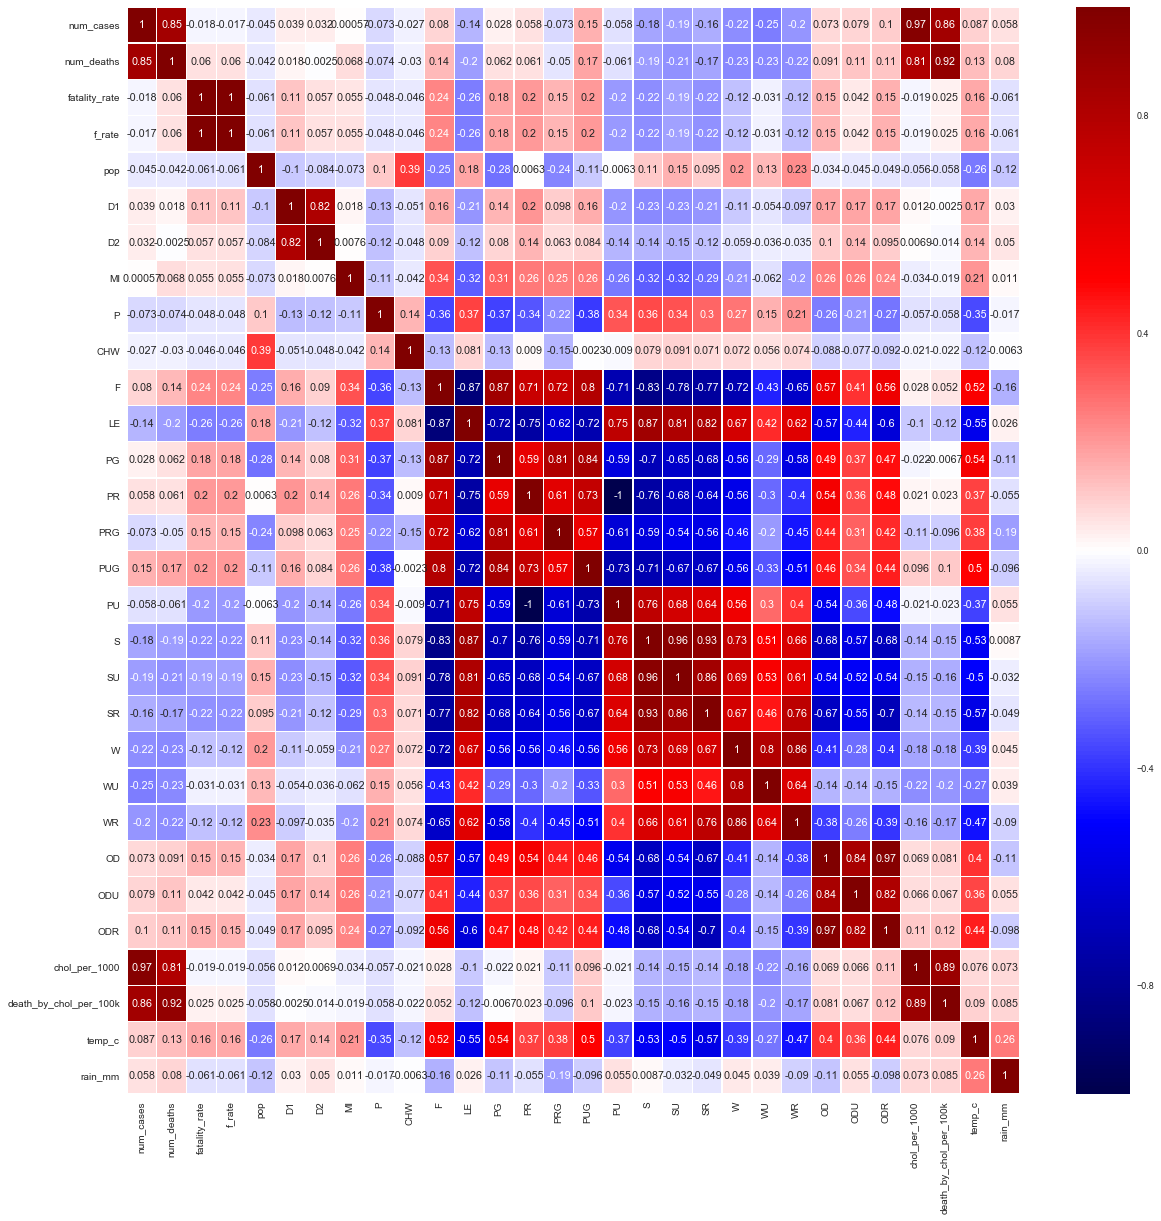

In [120]:
plt.subplots(figsize=(20, 20))
sns.set(font_scale = 0.9)
sns.heatmap(master_mi.corr(), linewidths = 0.4, cmap = "seismic", annot = True)

In [121]:
#sns.palplot(sns.diverging_palette(300, 200, n=7))

In [122]:
master_revised = master_mi.drop(["num_cases", "num_deaths", "fatality_rate"], axis = 1)

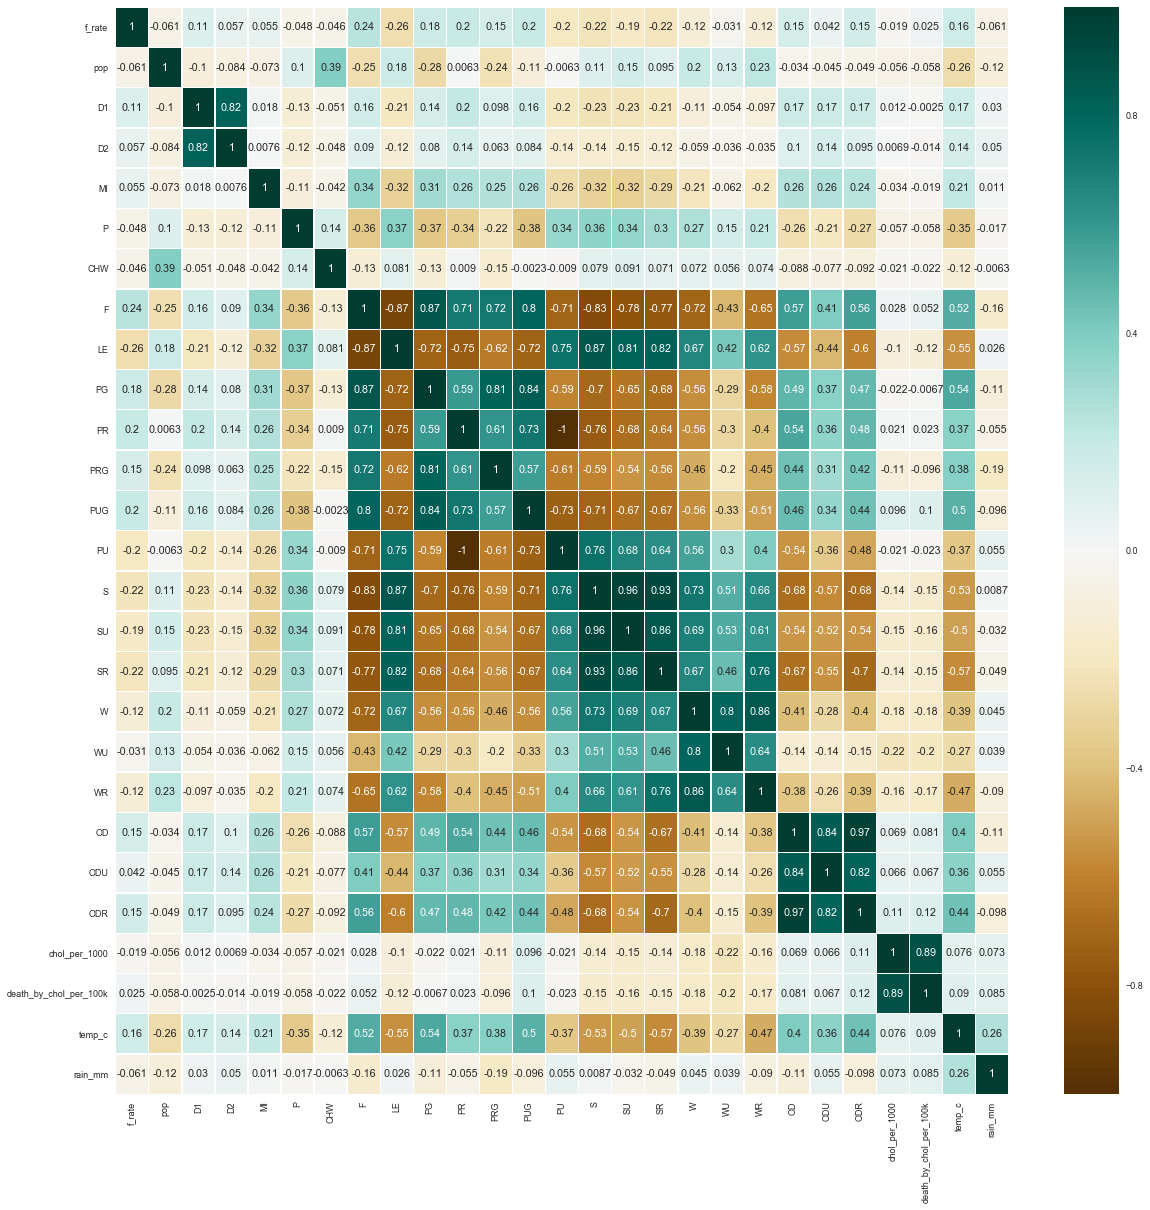

In [123]:
plt.subplots(figsize=(20, 20))
sns.set(font_scale = 0.9)
sns.heatmap(master_revised.corr(), linewidths = 0.4, cmap = "BrBG", annot = True)

In [124]:
##it looks as if, when country and year are locked in, fatality rate of cholera is correlated to:
    ##average yearly temperature
    ##practice of open defecation (mostly rural)
    ## lack of improved water source (mostly rural)
    ## lack of improved sanitation, both urban and rural
    ##small percentage of population is urban pop
    ##population growth
    ##rural population
    ## (lower life expectancy)
    ## high number of births per women
    
    ##NOT strongly correlated with access to healthcare or 
    ##large populations
    

In [125]:
##incidence of cholera-caused deaths, per 100,000 people, looks to be correlated with: 
    ##open defecation (rural mostly)
    ##lack of improved water source (urban more so than rural)
    ##growing urban population
    ##dwindling rural population

In [126]:
##incidence of cholera, per 1000 people, looks to be correlated with:
    ##rural open defecation
    ##lack of improved water source (urban more so than rural)
    ##lack of improved sanitation (urban more so than rural)
    ##growing urban populations
    ##dwindling rural populations
    ##overall lower life expectancy (not surprising, probably not a causal relationship)

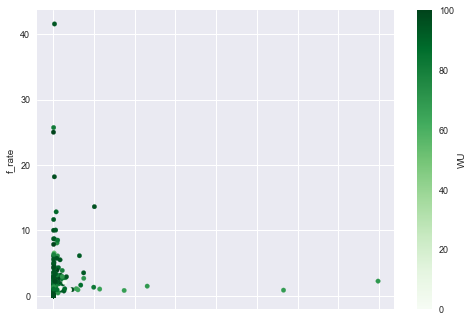

In [127]:
#master_revised.plot(kind = "scatter", x = "f_rate", y = "longitude", c = "price", colormap = "autumn")
master_revised.plot(kind = "scatter", x = "death_by_chol_per_100k", y = "f_rate", c = "WU", colormap = "Greens")

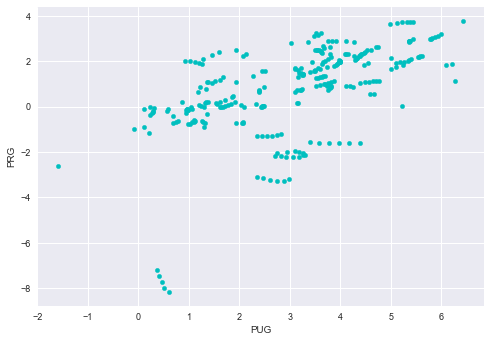

In [128]:
master_revised.plot(kind = "scatter", x = "PUG", y = "PRG", color = "c")

In [129]:
from bokeh.charts import Scatter, output_file, show, output_notebook, ColumnDataSource
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.models import HoverTool
from bokeh.charts import reset_output

T = master_revised.index

#ht = HoverTool(tooltips=[("T", "$T")], renderers=[p], mode='hline')

p = Scatter(master_revised, x="PUG", y="PRG", title="As Urban Populations Grow, on Average, Rural Populations Stay Static",
            xlabel="Urban Population Growth", ylabel="Rural Population Growth",
           color = "teal")
p.border_fill_color = "whitesmoke"
#output_file("scatter.html")
reset_output()
output_notebook()
show(p)

Loading BokehJS ...

In [130]:
p = Scatter(master_revised, x="ODU", y="ODR", title="Title",
            xlabel="Open Defecation, Urban", ylabel="Open Defecation, Rural",
           color = "teal")

In [131]:
show(p)

In [132]:
master2.head()

,country,year,num_cases,num_deaths,fatality_rate,f_rate,pop,D1,D2,MI,P,CHW,F,LE,PG,...,PUG,PU,S,SU,SR,W,WU,WR,OD,ODU,ODR,chol_per_1000,death_by_chol_per_100k,temp_c,rain_mm
0,Afghanistan,2015,58064,8.0,0.01,0.013778,32526562.0,40.7,46.2,23.6,0.000,0.0,4.653,60.717171,2.802986,...,4.392152,26.703,31.9,45.1,27.0,55.3,78.2,47.0,12.7,0.0,17.4,1.785126,0.024595,14.106833,388.17625
1,Afghanistan,2014,45481,4.0,0.00,0.008795,31627506.0,0.0,0.0,0.0,0.000,0.0,4.843,60.374463,3.033473,...,4.609630,26.282,31.8,45.1,27.0,55.2,78.2,47.0,12.8,0.0,17.4,1.438020,0.012647,13.966332,297.09286
2,Afghanistan,2013,3957,14.0,0.35,0.353803,30682500.0,0.0,0.0,0.0,0.266,0.0,5.050,60.028268,3.164336,...,4.734333,25.871,31.1,44.1,26.6,53.4,76.3,45.4,12.9,0.0,17.4,0.128966,0.045629,14.189569,326.10009
3,Afghanistan,2012,12,0.0,0.10,0.000000,29726803.0,0.0,0.0,0.0,0.225,0.0,5.272,59.679610,3.135546,...,4.694668,25.468,30.5,43.1,26.2,51.6,74.5,43.7,13.8,0.0,18.5,0.000404,0.000000,13.309705,388.20056
4,Afghanistan,2011,3733,44.0,1.18,1.178677,28809167.0,47.5,53.3,0.0,0.234,0.0,5.506,59.327951,2.983979,...,4.531355,25.074,29.9,42.1,25.8,49.8,72.6,42.1,14.7,0.0,19.7,0.129577,0.152729,14.071193,317.62138


In [133]:
master2.to_csv("~/Desktop/DSI_Capstone/master2.csv", index = False, encoding = "utf=8")
master_mi.to_csv("~/Desktop/DSI_Capstone/mastermi.csv", index = False, encoding = "utf=8")
master_revised.to_csv("~/Desktop/DSI_Capstone/masterrevised.csv", index = False, encoding = "utf=8")

In [134]:
master2.shape

(282, 32)

In [135]:
master_mi.loc[["Germany", 2010]]

num_cases  num_deaths  fatality_rate  f_rate         pop   D1  \
country year                                                                  
Germany 2010          4         1.0           25.0    25.0  81776930.0  0.0   
        2011          4         0.0            0.0     0.0  80274983.0  0.0   
        2014          1         0.0            0.0     0.0  80982500.0  0.0   

               D2   MI      P  CHW     F         LE        PG      PR  \
country year                                                            
Germany 2010  0.0  0.0  3.689  0.0  1.39  79.987805 -0.153198  25.709   
        2011  0.0  0.0  3.806  0.0  1.39  80.436585 -1.853715  25.512   
        2014  0.0  0.0  0.000  0.0  1.47  81.090244  0.416877  24.906   

                   PRG       PUG      PU     S    SU    SR      W     WU  \
country year                                                               
Germany 2010 -0.920407  0.113677  74.291  99.2  99.3  99.0  100.0  100.0   
        2011 -2.622933 -1.588893  74.488  99.2  99.3  99.0  100.0  100.0   
        2014 -0.398866  0.688907  75.094  99.2  99.3  99.0  100.0  100.0   

                 WR   OD  ODU  ODR  chol_per_1000  death_by_chol_per_100k  \
country year                                                                
Germany 2010  100.0  0.0  0.0  0.0       0.000049                0.001223   
        2011  100.0  0.0  0.0  0.0       0.000050                0.000000   
        2014  100.0  0.0  0.0  0.0       0.000012                0.000000   

                 temp_c   rain_mm  
country year                       
Germany 2010   8.322354  770.1824  
        2011  10.227294  665.9261  
        2014  10.795175  709.1465

In [136]:
master_mi.loc[["Pakistan", 2011]]

num_cases  num_deaths  fatality_rate     f_rate          pop  \
country  year                                                                 
Pakistan 2010        164         0.0           0.00   0.000000  170043918.0   
         2011        527       219.0          41.56  41.555977  173669648.0   
         2012        144         8.0           5.60   5.555556  177392252.0   
         2013       1069        23.0           2.15   2.151543  181192646.0   
         2014       1218         6.0           0.50   0.492611  185044286.0   

                 D1    D2    MI      P    CHW      F         LE        PG  \
country  year                                                               
Pakistan 2010   0.0   0.0  13.8  0.827  0.066  3.855  65.162561  2.093542   
         2011   0.0   0.0   0.0  0.000  0.000  3.802  65.447000  2.109818   
         2012   0.0   0.0   0.0  0.000  0.000  3.744  65.716878  2.120847   
         2013  35.8  38.0   0.0  0.000  0.000  3.682  65.963683  2.119741   
         2014   0.0   0.0   0.0  0.000  0.000  3.617  66.183366  2.103437   

                   PR       PRG       PUG      PU     S    SU    SR     W  \
country  year                                                               
Pakistan 2010  63.402  1.469331  3.184227  36.598  54.8  79.3  40.6  90.5   
         2011  62.993  1.462637  3.221167  37.007  56.5  80.0  42.7  90.7   
         2012  62.572  1.450276  3.252047  37.428  58.3  80.8  44.8  90.9   
         2013  62.140  1.426942  3.267348  37.860  60.0  81.6  46.9  91.1   
         2014  61.697  1.387978  3.266745  38.303  61.8  82.3  49.0  91.3   

                 WU    WR    OD  ODU   ODR  chol_per_1000  \
country  year                                               
Pakistan 2010  94.4  88.3  21.0  2.4  31.8       0.000964   
         2011  94.3  88.6  19.5  2.0  29.7       0.003034   
         2012  94.2  88.9  17.9  1.7  27.6       0.000812   
         2013  94.1  89.3  16.4  1.3  25.6       0.005900   
         2014  94.0  89.6  14.9  1.0  23.5       0.006582   

               death_by_chol_per_100k     temp_c    rain_mm  
country  year                                                
Pakistan 2010                0.000000  21.098072  382.09926  
         2011                0.126101  20.812609  325.08564  
         2012                0.004510  20.156629  274.33200  
         2013                0.012694  20.670548  355.45941  
         2014                0.003242  20.536739  267.53523

In [137]:
master_mi.loc[["Kenya", 2014]]

num_cases  num_deaths  fatality_rate     f_rate         pop  \
country year                                                                
Kenya   2010       3188        63.0           1.98   1.976161  40328313.0   
        2011         74         2.0           2.70   2.702703  41419954.0   
        2014         35         9.0          25.70  25.714286  44863583.0   
        2015      13291        67.0           0.50   0.504101  46050302.0   

                D1    D2     MI      P  CHW      F         LE        PG  \
country year                                                              
Kenya   2010   0.0   0.0   95.2  0.183  0.0  4.629  58.718610  2.659322   
        2011   0.0   0.0    0.0  0.181  0.0  4.556  59.534220  2.670897   
        2014  45.1  53.8    0.0  0.000  0.0  4.334  61.576366  2.644121   
        2015   0.0   0.0  166.0  0.000  0.0  4.263  62.133732  2.610792   

                  PR       PRG       PUG      PU     S    SU    SR     W  \
country year                                                               
Kenya   2010  76.429  2.152943  4.319118  23.571  29.2  30.5  28.8  60.0   
        2011  76.033  2.151424  4.336963  23.967  29.4  30.7  29.0  60.8   
        2014  74.803  2.088205  4.312927  25.197  30.1  31.2  29.7  63.1   
        2015  74.378  2.041014  4.283431  25.622  30.1  31.2  29.7  63.2   

                WU    WR    OD  ODU   ODR  chol_per_1000  \
country year                                               
Kenya   2010  83.3  52.9  13.2  2.7  16.4       0.079051   
        2011  82.9  53.9  12.9  2.6  16.1       0.001787   
        2014  81.6  56.8  12.1  2.6  15.3       0.000780   
        2015  81.6  56.8  12.0  2.6  15.3       0.288619   

              death_by_chol_per_100k     temp_c   rain_mm  
country year                                               
Kenya   2010                0.156218  25.394592  646.6178  
        2011                0.004829  25.354250  652.3784  
        2014                0.020061  25.449967  627.9245  
        2015                0.145493  25.446125  786.8370

In [138]:
import patsy
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [139]:
y1 = master_revised["chol_per_1000"]

In [140]:
master_revised.head()

f_rate         pop    D1    D2    MI      P  CHW      F  \
country     year                                                              
Afghanistan 2010  0.422119  27962207.0   0.0   0.0  23.9  0.194  0.0  5.746   
            2011  1.178677  28809167.0  47.5  53.3   0.0  0.234  0.0  5.506   
            2012  0.000000  29726803.0   0.0   0.0   0.0  0.225  0.0  5.272   
            2013  0.353803  30682500.0   0.0   0.0   0.0  0.266  0.0  5.050   
            2014  0.008795  31627506.0   0.0   0.0   0.0  0.000  0.0  4.843   

                         LE        PG      PR       PRG       PUG      PU  \
country     year                                                            
Afghanistan 2010  58.970829  2.736886  75.311  2.238868  4.271538  24.689   
            2011  59.327951  2.983979  74.926  2.471450  4.531355  25.074   
            2012  59.679610  3.135546  74.532  2.608310  4.694668  25.468   
            2013  60.028268  3.164336  74.129  2.622159  4.734333  25.871   
            2014  60.374463  3.033473  73.718  2.477493  4.609630  26.282   

                     S    SU    SR     W    WU    WR    OD  ODU   ODR  \
country     year                                                        
Afghanistan 2010  29.3  41.1  25.4  48.0  70.7  40.5  15.8  0.6  20.8   
            2011  29.9  42.1  25.8  49.8  72.6  42.1  14.7  0.0  19.7   
            2012  30.5  43.1  26.2  51.6  74.5  43.7  13.8  0.0  18.5   
            2013  31.1  44.1  26.6  53.4  76.3  45.4  12.9  0.0  17.4   
            2014  31.8  45.1  27.0  55.2  78.2  47.0  12.8  0.0  17.4   

                  chol_per_1000  death_by_chol_per_100k     temp_c    rain_mm  
country     year                                                               
Afghanistan 2010       0.084721                0.035763  14.489468  277.60699  
            2011       0.129577                0.152729  14.071193  317.62138  
            2012       0.000404                0.000000  13.309705  388.20056  
            2013       0.128966                0.045629  14.189569  326.10009  
            2014       1.438020                0.012647  13.966332  297.09286

In [207]:
X1 = master_revised.drop(["f_rate", "D1", "D2", "PU", "chol_per_1000",
                         "death_by_chol_per_100k", "P", "CHW", "MI"], axis = 1)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.25, random_state = 34)

In [209]:
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print rf.score(X_test, y_test)

0.499821767214


In [ ]:
#1.3 to 4.0 million cases, and 21 000 to 143 000 deaths worldwide due to cholera

In [145]:
wb2[wb2.country == "World"]

,country,year,pop,D1,D2,MI,P,CHW,F,LE,PG,PR,PRG,PUG,PU,S,SU,SR,W,WU,WR,OD,ODU,ODR
1778,World,2010,6.924027e+09,0.0,0.0,118.740388,0.000000,0.0,2.500071,70.483723,1.208991,48.514495,0.190250,2.194667,51.485505,64.848433,81.345940,47.381740,88.393576,96.091287,80.245412,16.027211,3.055581,28.657523
1779,World,2011,7.005661e+09,0.0,0.0,0.000000,1.538234,0.0,2.484796,70.760394,1.178998,48.028566,0.168966,2.137402,51.971434,65.316906,81.482232,47.901001,88.895548,96.135110,81.075681,15.644777,2.933920,28.251279
1780,World,2012,7.089715e+09,0.0,0.0,0.000000,0.000000,0.0,2.476970,70.995807,1.199801,47.544248,0.182190,2.145811,52.455752,65.930538,81.702785,48.587273,89.489444,96.236960,82.069993,14.438752,2.793113,27.099422
1781,World,2013,7.174864e+09,0.0,0.0,0.000000,0.000000,0.0,2.463261,71.238597,1.201033,47.068930,0.192093,2.120894,52.931070,66.499306,81.843210,49.250370,90.061867,96.338466,83.118507,13.935991,2.653507,26.550870
1782,World,2014,7.260692e+09,0.0,0.0,0.000000,0.000000,0.0,2.457187,71.471144,1.196222,46.601668,0.195168,2.093135,53.398332,67.018969,82.019209,49.823743,90.552251,96.378599,83.921913,13.649150,2.534720,26.215186
1783,World,2015,7.346706e+09,0.0,0.0,93.956287,0.000000,0.0,2.448208,71.675966,1.184655,46.142859,0.191863,2.057508,53.857141,67.527419,82.186964,50.320787,90.972749,96.461812,84.611361,13.344972,2.474491,25.925784
1784,World,2016,7.429764e+09,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.130549,45.698776,0.160818,1.967994,54.301224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [146]:
worldpop2014 = wb2.loc[1782,"pop"]
worldpop2014

7260691785.7391596

In [147]:
print 1300000/worldpop2014 * 1000
print 4000000/worldpop2014 * 1000

0.179046300044
0.550911692445


In [148]:
## world average for cholera incidence is 0.17-0.55 cases per 1000 people

In [149]:
print 21000/worldpop2014 * 100000
print 143000/worldpop2014 * 100000

0.289228638533
1.96950930049


In [150]:
# world average for deaths due to cholera is 0.29 - 1.97 deaths per 100,000 people

In [151]:
##need to drop P, CHW, d1, d2, MI

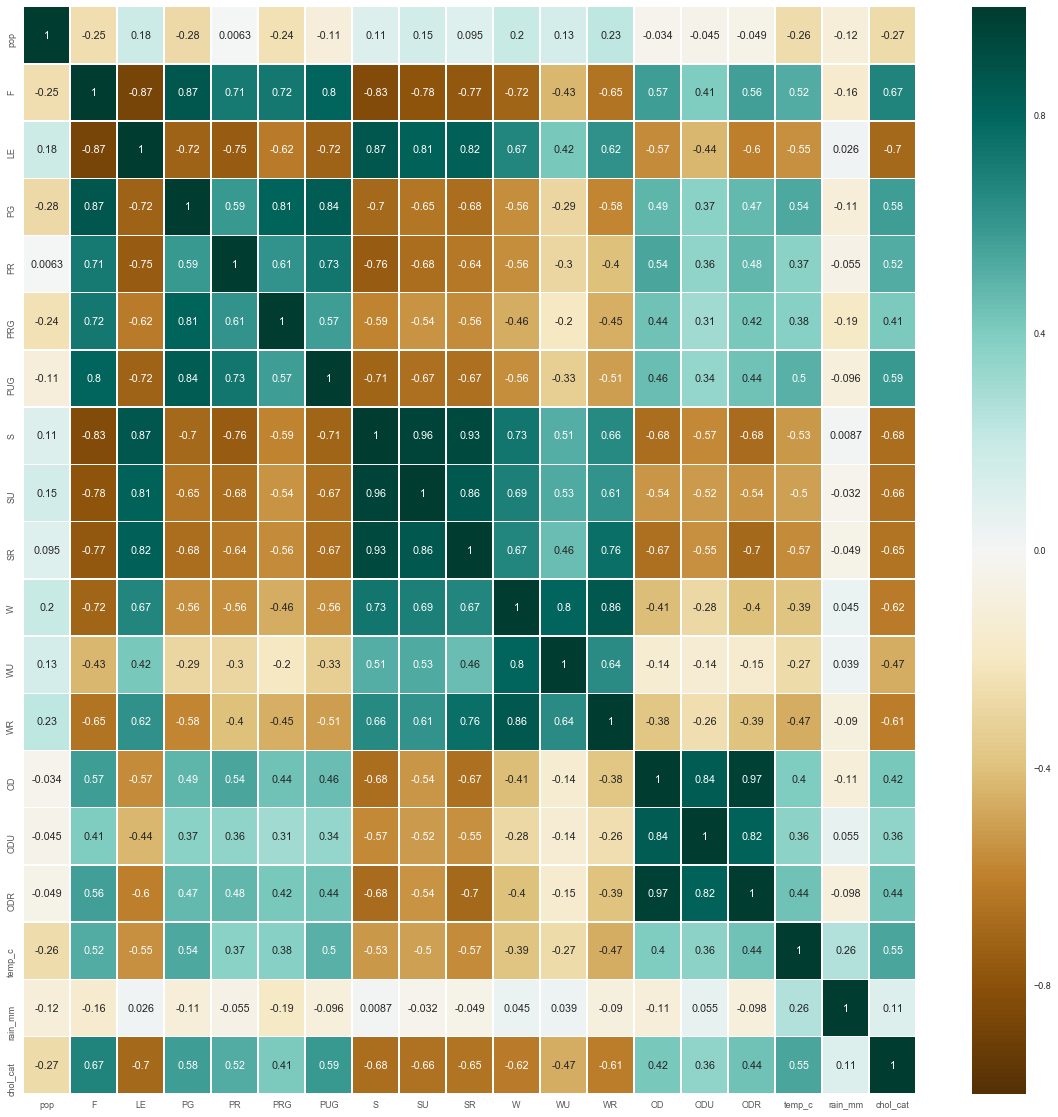

In [210]:
plt.subplots(figsize=(20, 20))
sns.set(font_scale = 0.9)
sns.heatmap(X1.corr(), linewidths = 0.4, annot = True, cmap = "BrBG")

In [153]:
master_revised.chol_per_1000.describe()

count    282.000000
mean       0.429414
std        2.444054
min        0.000005
25%        0.000263
50%        0.007963
75%        0.081630
max       33.545066
Name: chol_per_1000, dtype: float64

In [154]:
##I need to categorize my explanatory variable
##let's do 4 bins

In [155]:
## world average for cholera incidence is 0.17-0.55 cases per 1000 people

In [156]:
# import numpy as np
# a = [154, 400, 1124, 82, 94, 108]
# print np.percentile(a,95) # gives the 95th percentile

In [157]:
np.percentile(master_revised.chol_per_1000, 100)

33.545065545313946

In [158]:
Q3 = np.percentile(master_revised.chol_per_1000, 75)
Q4 = np.percentile(master_revised.chol_per_1000, 100)
Q2 = np.percentile(master_revised.chol_per_1000, 50)
Q1 = np.percentile(master_revised.chol_per_1000, 25)
print Q4
print Q3
print Q2
print Q1

33.5450655453
0.0816296069642
0.00796270397319
0.000262823643409


In [159]:
def cut_it(numseries):
    try:
        if numseries <= Q1:
            return 1
        elif numseries <= Q2:
            return 2
        elif numseries <= Q3:
            return 3
        elif numseries <= Q4:
            return 4
    except:
        pass

In [160]:
#df['column'] = df.apply(lambda row: function(row[value_for_function]), axis=1)
master_revised["chol_cat"] = master_revised.apply(lambda row: cut_it(row["chol_per_1000"]), axis = 1)

In [161]:
master_revised.chol_cat.value_counts()

4    71
1    71
3    70
2    70
Name: chol_cat, dtype: int64

In [230]:
master_revised.to_csv("~/Desktop/DSI_Capstone/masterrevised.csv", index = False, encoding = "utf=8")

In [211]:
Xcat = master_revised.drop(["f_rate", "D1", "D2", "PU", "chol_per_1000",
                         "death_by_chol_per_100k", "P", "CHW", "MI", "chol_cat"], axis = 1)
ycat = master_revised["chol_cat"]

In [232]:
X_train, X_test, y_train, y_test = train_test_split(Xcat, ycat, test_size = 0.3, random_state = 55)

In [164]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [233]:
rf = RandomForestClassifier(n_jobs=-1, max_depth = 4, random_state = 4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print rf.score(X_test, y_test)

0.611764705882


(-1, 18)

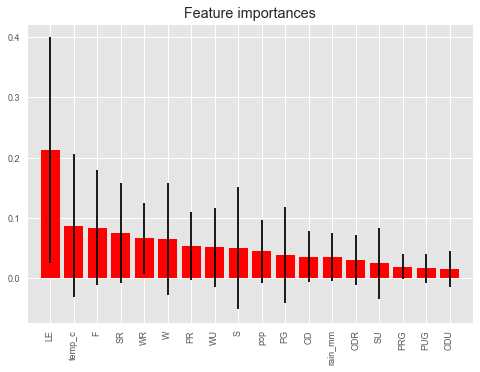

In [234]:

plt.style.use("ggplot")
all(rf.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = Xcat.columns

# Plot the feature importances of the forest
fig1 = plt.figure()
plt.title("Feature importances")
plt.bar(range(Xcat.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(Xcat.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, Xcat.shape[1]])

In [167]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [168]:
#from sklearn.preprocessing import OneHotEncoder

In [169]:
#from sklearn.linear_model import LogisticRegression

In [170]:
from sklearn.metrics import confusion_matrix, classification_report

In [215]:
confusion_matrix(y_test, y_pred)

array([[20,  3,  1,  1],
       [ 5,  9,  3,  5],
       [ 0,  3,  7,  7],
       [ 0,  0,  5, 16]])

In [216]:
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.80      0.80      0.80        25
          2       0.60      0.41      0.49        22
          3       0.44      0.41      0.42        17
          4       0.55      0.76      0.64        21

avg / total       0.61      0.61      0.60        85



In [173]:
from sklearn.model_selection import cross_val_score

In [217]:
s = cross_val_score(rf, X_train, y_train, cv= 5, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))

Random Forest Score:	0.569 ± 0.044


In [175]:
##can't do this with multi-class

# probabilities = rf.predict_proba(X_test) # Need the second value

# probability_list = [] # Becomes the list of probabilities
# for i in probabilities:
#     probability_list.append(i[1])
#     probabilities = probability_list

# roc_auc = roc_auc_score(y_test, probabilities)
# print roc_auc

In [176]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [177]:
from sklearn import svm

In [178]:
yb = label_binarize(ycat, classes=[1,2,3,4])
n_classes = yb.shape[1]

In [179]:
# classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
#                                  random_state=7))
# y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [227]:
Xcat2 = master_revised[["LE", "temp_c", "SR", "WR", "PR", "PG", "OD"]]

In [228]:
X_train, X_test, y_train, y_test = train_test_split(Xcat2, ycat, test_size = 0.35, random_state = 19)

In [229]:
rf2 = RandomForestClassifier(n_jobs=-1, max_depth = 5, random_state = 4)
rf2.fit(X_train, y_train)
y_pred = rf2.predict(X_test)
print rf2.score(X_test, y_test)

0.515151515152


In [205]:
##incidence of cholera, per 1000 people, looks to be correlated with:
    ##rural open defecation
    ##lack of improved water source (urban more so than rural)
    ##lack of improved sanitation (urban more so than rural)
    ##growing urban populations
    ##dwindling rural populations
    ##overall lower life expectancy (not surprising, probably not a causal relationship)

In [231]:
Xcat.columns

Index([u'pop', u'F', u'LE', u'PG', u'PR', u'PRG', u'PUG', u'S', u'SU', u'SR',
       u'W', u'WU', u'WR', u'OD', u'ODU', u'ODR', u'temp_c', u'rain_mm'],
      dtype='object')